# Asmaa Alzahrani 
# 05/11/2021

## Please model the following parameters:
We would like a ten year model starting in 2022 to 2032.
Your starting baseline historical Revenue is $222.00 for the FY 2021 (assume it's over for now). 
Parameters:  Values
Revenue Growth Rate: 18% of prior period Revenue
EBITDA Margin: 45.0% of current Revenue
Taxes: 21% of current EDBITDA
Capital Expenditures: 3% of current Revenue
Working Capital Increase: 6% of Revenue
EBITDA Exit Multiple: 32.70
Discount Factor: 0.94 (6%). 

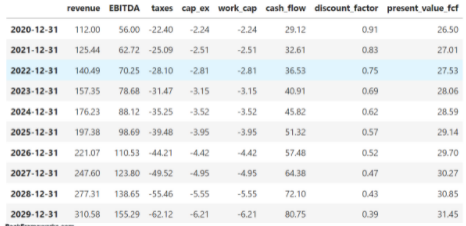


In [1]:
import numpy as np
import pandas as pd
import pandas

In [2]:
dates = ['2021','2022', '2023', '2024', '2025', '2026', '2027','2028', '2029','2030', '2031','2032' ]


In [3]:
#Your starting baseline historical Revenue is $222.00 for the FY 2021
Revenue = pd.Series(index=dates, dtype='float64')
Revenue['2021'] = 222


In [4]:
#Revenue Growth Rate: 18% of prior period Revenue
growth_rate = 0.18
for year in range(1, 12):
    Revenue[year] = Revenue[year - 1] * (1 + growth_rate)

In [5]:
#EBITDA Margin: 45.0% of current Revenue
ebitda_margin = 0.45
ebitda = Revenue * ebitda_margin

In [6]:
#axes: 21% of current EDBITDA
tax_rate = 0.21
taxes = -ebitda * tax_rate


In [7]:
#Capital Expenditures: 3% of current Revenue
capex_percent = 0.03
capital_expenditures = -(Revenue * capex_percent)

In [8]:
#Working Capital Increase: 6% of Revenue
nwc_percent = 0.06
nwc = -Revenue * nwc_percent

In [9]:
#cash flow
cash_flow = ebitda + taxes + capital_expenditures + nwc

In [10]:
#Discount Factor: 0.94 (6%). 

discount_rate = 0.06
discount_factor= pd.Series(index=dates, dtype='float64')

for year in range(0, 12):
    discount_factor[year]= (1 / (1 + discount_rate)) ** year

In [11]:
#Present Value of Future Cash Flow
pv_of_fcf = (cash_flow * discount_factor)

In [12]:
data = { 'revenue':Revenue,
        'EBITDA':ebitda, 
        'taxes':taxes, 
        'cap_ex':capital_expenditures, 
         'work_cap':nwc,
        'cash_flow':cash_flow, 
        'discount_factor': discount_factor, 
        'present_value_fcf':pv_of_fcf }
df = pd.DataFrame(data, index= dates)  
#change format
pd.options.display.float_format = "{:,.2f}".format
df

,revenue,EBITDA,taxes,cap_ex,work_cap,cash_flow,discount_factor,present_value_fcf
2021,222.00,99.90,-20.98,-6.66,-13.32,58.94,1.00,58.94
2022,261.96,117.88,-24.76,-7.86,-15.72,69.55,0.94,65.61
2023,309.11,139.10,-29.21,-9.27,-18.55,82.07,0.89,73.04
2024,364.75,164.14,-34.47,-10.94,-21.89,96.84,0.84,81.31
2025,430.41,193.68,-40.67,-12.91,-25.82,114.27,0.79,90.52
2026,507.88,228.55,-47.99,-15.24,-30.47,134.84,0.75,100.76
2027,599.30,269.69,-56.63,-17.98,-35.96,159.11,0.70,112.17
2028,707.18,318.23,-66.83,-21.22,-42.43,187.76,0.67,124.87
2029,834.47,375.51,-78.86,-25.03,-50.07,221.55,0.63,139.00
2030,984.67,443.10,-93.05,-29.54,-59.08,261.43,0.59,154.74


In [13]:
#total present value of Future Cash Flows
total_fcf =pv_of_fcf.sum()
total_fcf


1364.9816538112213

In [14]:
#test #chande the format
format_sum="{:.2f}".format(total_fcf)
format_sum

'1364.98'

In [15]:
#EBITDA Exit Multiple: 32.70
#terminal_value 
ebitda_exit_multiple = 32.70
terminal_value = (ebitda_exit_multiple*ebitda[11])
terminal_value


20175.082590019254

In [16]:
Revenue['2032']

1371.055561673072

In [17]:
print(f"""Our projected Present Value of Projected Future Cash Flows are:{format_sum}.\n
We are providing revenue guidance in 2032 to be: {Revenue['2032']:.2f}.
      \nWith an estimated EBITDA around:{ebitda['2032']:.2f}.""")

Our projected Present Value of Projected Future Cash Flows are:1364.98.

We are providing revenue guidance in 2032 to be: 1371.06.
      
With an estimated EBITDA around:616.98.


In [18]:
print(f"""The terminal value at this time given a multiple of {ebitda_exit_multiple:.2f} 
\nand the above EBITDA for 2030, would equal: {terminal_value:.2f}.""")

The terminal value at this time given a multiple of 32.70 

and the above EBITDA for 2030, would equal: 20175.08.


# Thank you & Sorry for late 